In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

### 1. Загрузка данных
Загрузить данные всех наблюдений с 2019-12-21 по 2023-05-03 и отбросить последний день. Создать ряд
наблюдений с 2019-12-21 по 2023-05-04.

In [349]:
df = pd.read_excel('/Users/nkt1lyn/coef_opr_actions.xlsx')
df

,Time,Var1
0,2019-12-21,0.543378
1,2019-12-22,0.504853
2,2019-12-23,0.430356
3,2019-12-24,0.527782
4,2019-12-25,0.497517
...,...,...
1166,2023-03-01,0.456620
1167,2023-03-02,0.550202
1168,2023-03-03,0.472124
1169,2023-03-04,0.575550


возможно вы перепутали местами месяц и день, из-за чего в задании указали, что нужно загрузить данные по 2023-05-04. Поэтому загружаю все данные, кроме последнего дня.

In [350]:
df = df.loc[df['Time'] >= '2019-12-21']
df = df.loc[df['Time'] <= '2023-03-04']
df

,Time,Var1
0,2019-12-21,0.543378
1,2019-12-22,0.504853
2,2019-12-23,0.430356
3,2019-12-24,0.527782
4,2019-12-25,0.497517
...,...,...
1165,2023-02-28,0.479268
1166,2023-03-01,0.456620
1167,2023-03-02,0.550202
1168,2023-03-03,0.472124


In [351]:
mean = df['Var1'].mean()
std = df['Var1'].std()


### 2. Визуализация данных
Вывести график временного ряда, на графике добавить среднее значение по всем наблюдениям и области, кратные стандартному отклонению (Std): &#177; 1 Std,
&#177; 2 Std, &#177; 3 Std. Добавить заголовок и подписи для осей.

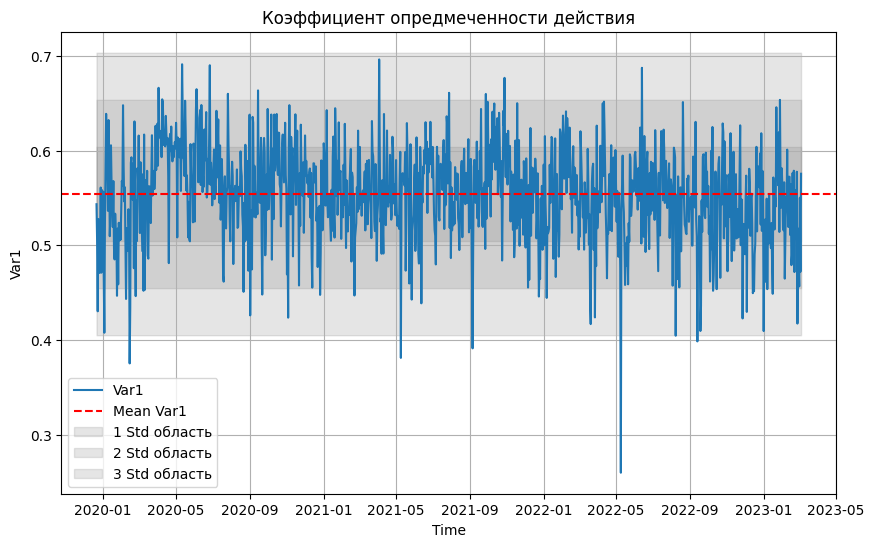

In [353]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Var1'], label='Var1')

mean_value = df['Var1'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean Var1')

for i in range(1, 4):
    plt.fill_between(df['Time'], mean_value - i * std, mean_value + i * std,
                     color='gray', alpha=0.2, label=f'{i} Std область')

plt.xlabel('Time')
plt.ylabel('Var1')
plt.title('Коэффициент опредмеченности действия')
plt.legend()
plt.grid(True)
plt.show()


### 3. Работа с данными
#### 3.1 Заполнить пропуски ('missing') в таблице:

In [354]:
df['Std'] = np.select(
    [(df['Var1'] >= mean - std) & (df['Var1'] <= mean + std), #Std1
     ((df['Var1'] >= mean - 2 * std) & (df['Var1'] < mean - std)) | ((df['Var1'] > mean + std) & (df['Var1'] <= mean + 2 * std)),
     ((df['Var1'] >= mean - 3 * std) & (df['Var1'] < mean - 2 * std)) | ((df['Var1'] > mean + 2 * std) & (df['Var1'] <= mean + 3 * std)),
     (df['Var1'] < mean - 3 * std) | (df['Var1'] > mean + 3 * std)],
    ['+-1Std', '+-2Std', '+-3Std', '> +-3Std'],
    default='Undefined'
)

df['Std'].value_counts()

Std
+-1Std      831
+-2Std      287
+-3Std       46
> +-3Std      6
Name: count, dtype: int64

In [355]:
Std1 = df.loc[df['Std'] == '+-1Std', 'Var1']
Std2 = df.loc[df['Std'] == '+-2Std', 'Var1']
Std3 = df.loc[df['Std'] == '+-3Std', 'Var1']
More_Std3 = df.loc[df['Std'] == '> +-3Std', 'Var1']

percentage_1_std = (len(Std1) / len(df['Var1'])) * 100
percentage_2_std = (len(Std2) / len(df['Var1'])) * 100
percentage_3_std = (len(Std3) / len(df['Var1'])) * 100
percentage_more_3_std = (len(More_Std3) / len(df['Var1'])) * 100

percentage_1_std_acc = (len(Std1) / len(df['Var1'])) * 100
percentage_2_std_acc = ((len(Std1) + len(Std2)) / len(df['Var1'])) * 100
percentage_3_std_acc = ((len(Std1) + len(Std2) + len(Std3)) / len(df['Var1'])) * 100
percentage_more_3_std_acc = ((len(Std1) + len(Std2) + len(Std3) + len(More_Std3))/ len(df['Var1'])) * 100


In [356]:
column_names = ['Области', 'Количество данных', 'В процентах', 'Накопление по областям(%)']
areas = ['1 Std', '2 Std', '3 Std', '> 3 Std', 'Всего']
data_count = [len(Std1), len(Std2), len(Std3), len(More_Std3), len(df)]
data_percentage = [percentage_1_std, percentage_2_std, percentage_3_std, percentage_more_3_std, 100]
perc = [percentage_1_std_acc, percentage_2_std_acc, percentage_3_std_acc, percentage_more_3_std_acc, '']


data_areas = pd.DataFrame(columns=column_names)
data_areas['Области'] = areas
data_areas['Количество данных'] = data_count
data_areas['В процентах'] = data_percentage
data_areas['Накопление по областям(%)'] = perc

data_areas

,Области,Количество данных,В процентах,Накопление по областям(%)
0,1 Std,831,71.025641,71.025641
1,2 Std,287,24.529915,95.555556
2,3 Std,46,3.931624,99.487179
3,> 3 Std,6,0.512821,100.0
4,Всего,1170,100.000000,


### 3.2 Базовый уровень

Определить базовый уровень по формуле:

BaseLevel = вектор-строка из двух компонент (BL1, BL2), где

BL1 = 100 * "Кол-во данных в области 1 Std" / "Общее кол-во данных" 

BL2 = 100 * "Кол-во данных в области > 1 Std" / "Общее кол-во данных"

In [357]:
BL1 = 100 * len(Std1) / len(df)
BL2 = 100 * (len(df) - len(Std1)) / len(df)

BaseLevel = [BL1, BL2]
BaseLevel

[71.02564102564102, 28.974358974358974]

### 3.3 Категоризация данных
Ввести категории "Белые дни" и "Черные дни". В категорию "Белые дни" попадают дни, в которые значения временного ряда не больше 1 Std, а в категорию "Черные дни" - все остальные дни.

Выбрать временные интервалы:

"Весна" - с 01 марта по 31 мая;

"Лето" - с 01 июня по 31 августа;

"Осень" - с 01 сентября по 30 ноября;

"Зима" - с 01 декабря по 28 февраля;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по сезонам суммарно за все годы наблюдений (т.е. "Весна" = "Весна 2020" + "Весна 2021" + "Весна 2022", и т.д.).

In [358]:
df

,Time,Var1,Std
0,2019-12-21,0.543378,+-1Std
1,2019-12-22,0.504853,+-1Std
2,2019-12-23,0.430356,+-3Std
3,2019-12-24,0.527782,+-1Std
4,2019-12-25,0.497517,+-2Std
...,...,...,...
1165,2023-02-28,0.479268,+-2Std
1166,2023-03-01,0.456620,+-2Std
1167,2023-03-02,0.550202,+-1Std
1168,2023-03-03,0.472124,+-2Std


In [359]:
df_cat = df.copy().loc[(df['Time'] >= '2020-03-01') & (df['Time'] <= '2023-02-28')]
df_cat

,Time,Var1,Std
71,2020-03-01,0.558665,+-1Std
72,2020-03-02,0.512968,+-1Std
73,2020-03-03,0.587722,+-1Std
74,2020-03-04,0.557022,+-1Std
75,2020-03-05,0.527966,+-1Std
...,...,...,...
1161,2023-02-24,0.506522,+-1Std
1162,2023-02-25,0.577663,+-1Std
1163,2023-02-26,0.417407,+-3Std
1164,2023-02-27,0.517620,+-1Std


In [360]:
df_cat['Категория дня'] = np.where((df_cat['Var1'] >= mean - std) & (df_cat['Var1'] <= mean + std), 'White', 'Black').astype(str)

df_cat['Время года'] = np.where((df_cat['Time'].dt.month >= 3) & (df_cat['Time'].dt.month <= 5), 'Весна',
                    np.where((df_cat['Time'].dt.month >= 6) & (df_cat['Time'].dt.month <= 8), 'Лето',
                               np.where((df_cat['Time'].dt.month >= 9) & (df_cat['Time'].dt.month <= 11), 'Осень', 'Зима')))

In [361]:
df_cat

,Time,Var1,Std,Категория дня,Время года
71,2020-03-01,0.558665,+-1Std,White,Весна
72,2020-03-02,0.512968,+-1Std,White,Весна
73,2020-03-03,0.587722,+-1Std,White,Весна
74,2020-03-04,0.557022,+-1Std,White,Весна
75,2020-03-05,0.527966,+-1Std,White,Весна
...,...,...,...,...,...
1161,2023-02-24,0.506522,+-1Std,White,Зима
1162,2023-02-25,0.577663,+-1Std,White,Зима
1163,2023-02-26,0.417407,+-3Std,Black,Зима
1164,2023-02-27,0.517620,+-1Std,White,Зима


In [362]:
df_cat['Категория дня'].value_counts()

Категория дня
White    784
Black    311
Name: count, dtype: int64

In [363]:
df_cat['Время года'].value_counts()

Время года
Весна    276
Лето     276
Осень    273
Зима     270
Name: count, dtype: int64

In [364]:
seasons = ['Зима', 'Весна', 'Лето', 'Осень']
seasons_list = []

for season in seasons:
    count_white_days = np.sum((df_cat.loc[df_cat['Время года'] == season, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_cat.loc[df_cat['Время года'] == season, 'Категория дня'] == 'Black'))    
    season_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / season_len) * 100
    percentage_black_days = (count_black_days / season_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    seasons_list.append({
        'Сезон': season,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

season_levels_df_cat = pd.DataFrame(seasons_list)

season_levels_df_cat

,Сезон,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Зима,72.962963,27.037037,1.937322,-1.937322
1,Весна,69.927536,30.072464,-1.098105,1.098105
2,Лето,77.898551,22.101449,6.872910,-6.872910
3,Осень,65.567766,34.432234,-5.457875,5.457875


## 3.4 Визуализация
Наглядно отобразить на столбчатой диаграмме (bar) отклонения в процентах по сезонам от базового уровня. Добавить заголовок и подписи для осей.

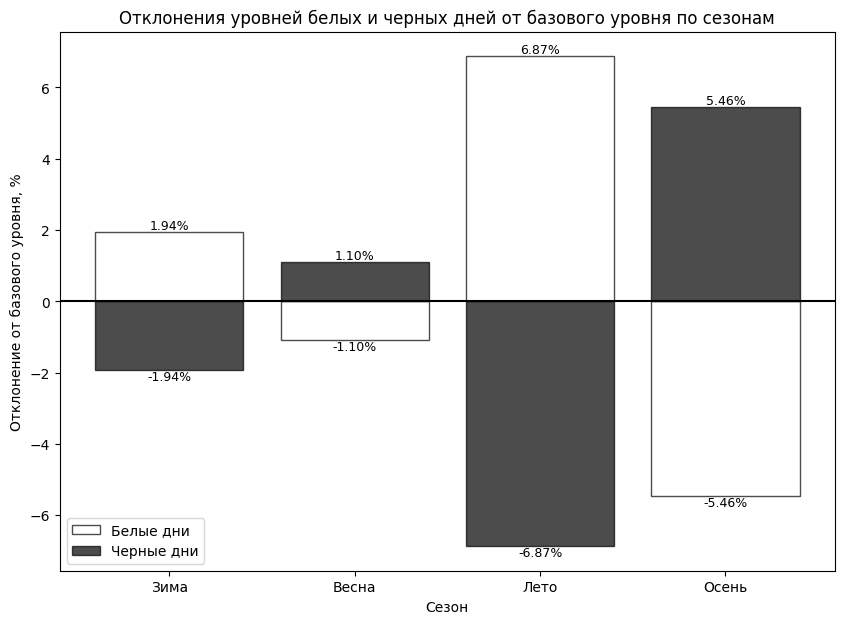

In [365]:
plt.figure(figsize=(10, 7))

bar1 = plt.bar(np.arange(len(season_levels_df_cat['Сезон'])), season_levels_df_cat['Отклонение от BL White'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')
bar2 = plt.bar(np.arange(len(season_levels_df_cat['Сезон'])), season_levels_df_cat['Отклонение от BL Black'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')

for i, (val1, val2) in enumerate(zip(season_levels_df_cat['Отклонение от BL White'], season_levels_df_cat['Отклонение от BL Black'])):
    plt.text(i, val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Сезон')
plt.ylabel('Отклонение от базового уровня, %')
plt.title('Отклонения уровней белых и черных дней от базового уровня по сезонам')
plt.xticks(np.arange(len(season_levels_df_cat['Сезон'])), season_levels_df_cat['Сезон'])
plt.legend(loc='lower left')
plt.show()


# Задание 2

### 3.1 Агрегирование данных поквартально

Выбрать временные интервалы:

"1-й квартал" - с января по март включительно; 

"2-й квартал" - с апреля по июнь включительно; 

"3-й квартал" - с июля по сентябрь включительно; 

"4-й квартал" - с октября по декабрь включительно;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по кварталам суммарно за все годы наблюдений (т.е. "1-й Квартал" = "1-й квартал 2020" + "1-й квартал 2021" + "1-й квартал 2022", и т.д.).

In [366]:
df_qat = df.copy().loc[(df['Time'].dt.year >= 2020) & (df['Time'].dt.year <= 2022)]
df_qat

,Time,Var1,Std
11,2020-01-01,0.556766,+-1Std
12,2020-01-02,0.469028,+-2Std
13,2020-01-03,0.407727,+-3Std
14,2020-01-04,0.524469,+-1Std
15,2020-01-05,0.581420,+-1Std
...,...,...,...
1102,2022-12-27,0.521956,+-1Std
1103,2022-12-28,0.618273,+-2Std
1104,2022-12-29,0.515231,+-1Std
1105,2022-12-30,0.578526,+-1Std


In [367]:
df_qat['Категория дня'] = np.where((df_qat['Var1'] >= mean - std) & (df_qat['Var1'] <= mean + std), 'White', 'Black').astype(str)

df_qat['Квартал'] = np.where((df_qat['Time'].dt.month >= 1) & (df_qat['Time'].dt.month <= 3), '1-й квартал',
                      np.where((df_qat['Time'].dt.month >= 4) & (df_qat['Time'].dt.month <= 6), '2-й квартал',
                               np.where((df_qat['Time'].dt.month >= 7) & (df_qat['Time'].dt.month <= 9), '3-й квартал', '4-й квартал')))

In [368]:
df_qat

,Time,Var1,Std,Категория дня,Квартал
11,2020-01-01,0.556766,+-1Std,White,1-й квартал
12,2020-01-02,0.469028,+-2Std,Black,1-й квартал
13,2020-01-03,0.407727,+-3Std,Black,1-й квартал
14,2020-01-04,0.524469,+-1Std,White,1-й квартал
15,2020-01-05,0.581420,+-1Std,White,1-й квартал
...,...,...,...,...,...
1102,2022-12-27,0.521956,+-1Std,White,4-й квартал
1103,2022-12-28,0.618273,+-2Std,Black,4-й квартал
1104,2022-12-29,0.515231,+-1Std,White,4-й квартал
1105,2022-12-30,0.578526,+-1Std,White,4-й квартал


In [369]:
df_qat['Квартал'].value_counts()

Квартал
3-й квартал    276
4-й квартал    276
2-й квартал    273
1-й квартал    271
Name: count, dtype: int64

In [370]:
quarter = ['1-й квартал', '2-й квартал', '3-й квартал', '4-й квартал']
quarter_list = []

for q in quarter:
    count_white_days = np.sum((df_qat.loc[df_qat['Квартал'] == q, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_qat.loc[df_qat['Квартал'] == q, 'Категория дня'] == 'Black'))    
    q_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / q_len) * 100
    percentage_black_days = (count_black_days / q_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    quarter_list.append({
        'Квартал': q,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

quarter_list_df_qat = pd.DataFrame(quarter_list)

quarter_list_df_qat

,Квартал,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,1-й квартал,73.800738,26.199262,2.775097,-2.775097
1,2-й квартал,67.032967,32.967033,-3.992674,3.992674
2,3-й квартал,78.260870,21.739130,7.235229,-7.235229
3,4-й квартал,66.666667,33.333333,-4.358974,4.358974


In [371]:
df_qat

,Time,Var1,Std,Категория дня,Квартал
11,2020-01-01,0.556766,+-1Std,White,1-й квартал
12,2020-01-02,0.469028,+-2Std,Black,1-й квартал
13,2020-01-03,0.407727,+-3Std,Black,1-й квартал
14,2020-01-04,0.524469,+-1Std,White,1-й квартал
15,2020-01-05,0.581420,+-1Std,White,1-й квартал
...,...,...,...,...,...
1102,2022-12-27,0.521956,+-1Std,White,4-й квартал
1103,2022-12-28,0.618273,+-2Std,Black,4-й квартал
1104,2022-12-29,0.515231,+-1Std,White,4-й квартал
1105,2022-12-30,0.578526,+-1Std,White,4-й квартал


### 3.2 Агрегирование данных вне сезонов

Выбрать временные интервалы:

"Февраль-Апрель" - с февраля по апрель включительно;

"Май-Июль" - с мая по июль включительно;

"Август-Октябрь" - с августа по октябрь включительно;

"Ноябрь-Январь" - с ноября по январь включительно;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) в межсезоньн суммарно за все годы наблюдений (т.е. "Февраль-Март" = "фев-мар" + "фев-мар 2021" + "фев-мар 2022", и т.д.).


In [372]:
df_out_season = df.copy().loc[(df['Time'] >= '2020-02-01') & (df['Time'] <= '2023-01-31')]
df_out_season

,Time,Var1,Std
42,2020-02-01,0.567935,+-1Std
43,2020-02-02,0.563229,+-1Std
44,2020-02-03,0.647851,+-2Std
45,2020-02-04,0.582788,+-1Std
46,2020-02-05,0.546306,+-1Std
...,...,...,...
1133,2023-01-27,0.514090,+-1Std
1134,2023-01-28,0.653494,+-2Std
1135,2023-01-29,0.565529,+-1Std
1136,2023-01-30,0.539833,+-1Std


In [373]:
df_out_season['Категория дня'] = np.where((df_out_season['Var1'] >= mean - std) & (df_out_season['Var1'] <= mean + std), 'White', 'Black').astype(str)

df_out_season['Вне сезонов'] = np.where((df_out_season['Time'].dt.month >= 2) & (df_out_season['Time'].dt.month <= 4), 'Февраль-Апрель',
                      np.where((df_out_season['Time'].dt.month >= 5) & (df_out_season['Time'].dt.month <= 7), 'Май-Июль',
                               np.where((df_out_season['Time'].dt.month >= 8) & (df_out_season['Time'].dt.month <= 10), 'Август-Октябрь', 'Ноябрь-Январь')))

In [374]:
df_out_season['Вне сезонов'].value_counts()

Вне сезонов
Май-Июль          276
Август-Октябрь    276
Ноябрь-Январь     276
Февраль-Апрель    268
Name: count, dtype: int64

In [375]:
out_season = ['Февраль-Апрель', 'Май-Июль', 'Август-Октябрь', 'Ноябрь-Январь']
out_season_list = []

for s in out_season:
    count_white_days = np.sum((df_out_season.loc[df_out_season['Вне сезонов'] == s, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_out_season.loc[df_out_season['Вне сезонов'] == s, 'Категория дня'] == 'Black'))    
    q_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / q_len) * 100
    percentage_black_days = (count_black_days / q_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    out_season_list.append({
        'Вне сезонов': s,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

out_season_list_df_out_season = pd.DataFrame(out_season_list)

out_season_list_df_out_season

,Вне сезонов,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Февраль-Апрель,70.895522,29.104478,-0.130119,0.130119
1,Май-Июль,72.101449,27.898551,1.075808,-1.075808
2,Август-Октябрь,71.376812,28.623188,0.351171,-0.351171
3,Ноябрь-Январь,70.289855,29.710145,-0.735786,0.735786


### 3.3 Визуализация

Наглядно отобразить на столбчатой диаграмме (bar) отклонения уровней белых и черных дней от
базового уровня по кварталам и в межсезонье (2 разных диаграммы). 

Добавить обозначения, заголовок и подписи для осей.

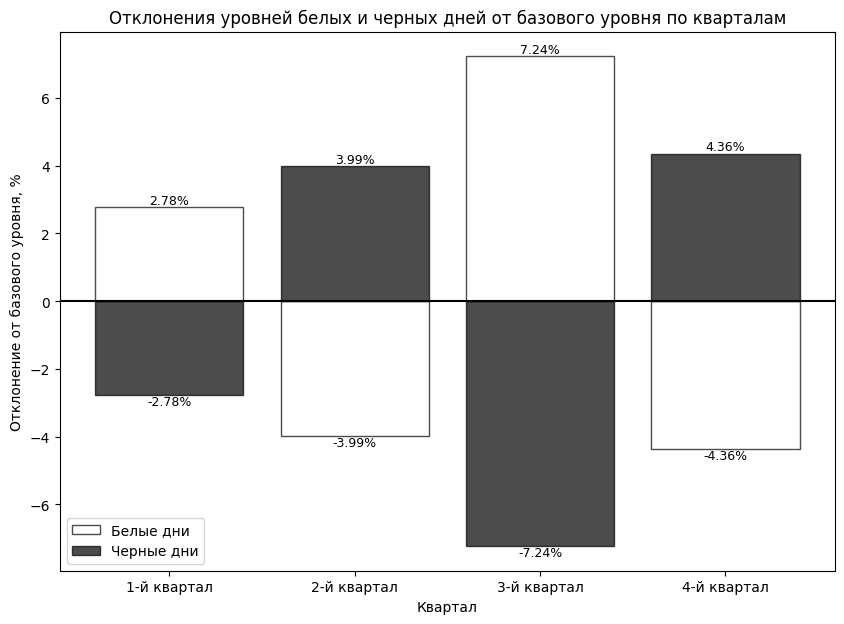

In [376]:
plt.figure(figsize=(10, 7))

bar1 = plt.bar(np.arange(len(quarter_list_df_qat['Квартал'])), quarter_list_df_qat['Отклонение от BL White'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')
bar2 = plt.bar(np.arange(len(quarter_list_df_qat['Квартал'])), quarter_list_df_qat['Отклонение от BL Black'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')

for i, (val1, val2) in enumerate(zip(quarter_list_df_qat['Отклонение от BL White'], quarter_list_df_qat['Отклонение от BL Black'])):
    plt.text(i, val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Квартал')
plt.ylabel('Отклонение от базового уровня, %')
plt.title('Отклонения уровней белых и черных дней от базового уровня по кварталам')
plt.xticks(np.arange(len(quarter_list_df_qat['Квартал'])), quarter_list_df_qat['Квартал'])
plt.legend(loc='lower left')
plt.show()


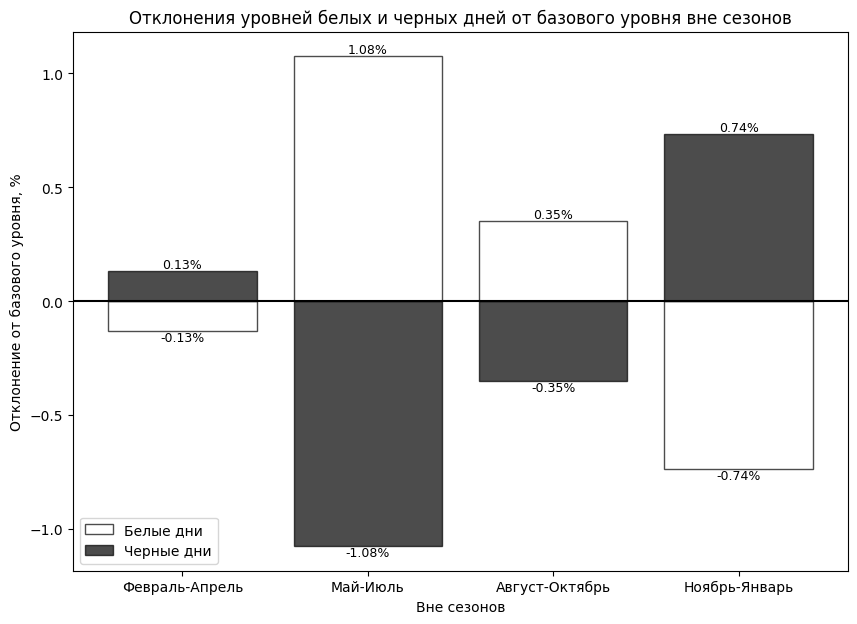

In [377]:
plt.figure(figsize=(10, 7))

bar1 = plt.bar(np.arange(len(out_season_list_df_out_season['Вне сезонов'])), out_season_list_df_out_season['Отклонение от BL White'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')
bar2 = plt.bar(np.arange(len(out_season_list_df_out_season['Вне сезонов'])), out_season_list_df_out_season['Отклонение от BL Black'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')

for i, (val1, val2) in enumerate(zip(out_season_list_df_out_season['Отклонение от BL White'], out_season_list_df_out_season['Отклонение от BL Black'])):
    plt.text(i, val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Вне сезонов')
plt.ylabel('Отклонение от базового уровня, %')
plt.title('Отклонения уровней белых и черных дней от базового уровня вне сезонов')
plt.xticks(np.arange(len(out_season_list_df_out_season['Вне сезонов'])), out_season_list_df_out_season['Вне сезонов'])
plt.legend(loc='lower left')
plt.show()


# Задание 3

### 1.1 Агрегирование сезонных данных ежегодно с 2020 года по 2023 год Выбрать временные интервалы:

- **Весна 2020**: с 1 марта 2020 года по 31 мая 2020 года;
- **Лето 2020**: с 1 июня по 31 августа 2020 года;
- **Осень 2020**: с 1 сентября по 30 ноября 2020 года;
- **Зима 2021**: с 1 декабря 2020 года по 28 февраля 2021 года;
- **Весна 2021**: с 01 марта по 31 мая 2021 года;
- **Лето 2021**: с 1 июня по 31 августа 2021 года;
- **Осень 2021**: с 1 сентября по 30 ноября 2021 года;
- **Зима 2022**: с 1 декабря 2021 года по 28 февраля 2022 года;
- **Весна 2022**: с 01 марта по 31 мая 2022 года;
- **Лето 2022**: с 1 июня по 31 августа 2022 года;
- **Осень 2022**: с 1 сентября по 30 ноября 2022 года;
- **Зима 2023**: с 1 декабря 2022 года по 28 февраля 2023 года.

Определить уровни белых и черных дней по временам года в каждом году.

In [378]:
df = pd.read_excel('/Users/nkt1lyn/coef_opr_actions.xlsx')


In [379]:
df_seasons = df.copy().loc[(df['Time'] >= '2020-03-01') & (df['Time'] <= '2023-02-28')]
df_seasons['Сезон'] = '-'

seasons = {
    'Весна 2020': ('2020-03-01', '2020-05-31'),
    'Лето 2020': ('2020-06-01', '2020-08-31'),
    'Осень 2020': ('2020-09-01', '2020-11-30'),
    'Зима 2021': ('2020-12-01', '2021-02-28'),
    'Весна 2021': ('2021-03-01', '2021-05-31'),
    'Лето 2021': ('2021-06-01', '2021-08-31'),
    'Осень 2021': ('2021-09-01', '2021-11-30'),
    'Зима 2022': ('2021-12-01', '2022-02-28'),
    'Весна 2022': ('2022-03-01', '2022-05-31'),
    'Лето 2022': ('2022-06-01', '2022-08-31'),
    'Осень 2022': ('2022-09-01', '2022-11-30'),
    'Зима 2023': ('2022-12-01', '2023-02-28'),
}

for season, (start_date, end_date) in seasons.items():
    df_seasons.loc[(df_seasons['Time'] >= start_date) & (df_seasons['Time'] <= end_date), 'Сезон'] = season


In [380]:
df_seasons['Категория дня'] = np.where((df_seasons['Var1'] >= mean - std) & (df_seasons['Var1'] <= mean + std), 'White', 'Black').astype(str)
df_seasons

,Time,Var1,Сезон,Категория дня
71,2020-03-01,0.558665,Весна 2020,White
72,2020-03-02,0.512968,Весна 2020,White
73,2020-03-03,0.587722,Весна 2020,White
74,2020-03-04,0.557022,Весна 2020,White
75,2020-03-05,0.527966,Весна 2020,White
...,...,...,...,...
1161,2023-02-24,0.506522,Зима 2023,White
1162,2023-02-25,0.577663,Зима 2023,White
1163,2023-02-26,0.417407,Зима 2023,Black
1164,2023-02-27,0.517620,Зима 2023,White


In [381]:
df_seasons['Сезон'].value_counts()

Сезон
Весна 2020    92
Лето 2020     92
Весна 2021    92
Лето 2021     92
Весна 2022    92
Лето 2022     92
Осень 2020    91
Осень 2021    91
Осень 2022    91
Зима 2021     90
Зима 2022     90
Зима 2023     90
Name: count, dtype: int64

In [382]:
seasons = ['Весна 2020', 'Лето 2020', 'Осень 2020',
           'Зима 2021', 'Весна 2021', 'Лето 2021', 'Осень 2021',
           'Зима 2022', 'Весна 2022', 'Лето 2022', 'Осень 2022', 
           'Зима 2023'
           ]
seasons_list = []

for season in seasons:
    count_white_days = np.sum((df_seasons.loc[df_seasons['Сезон'] == season, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_seasons.loc[df_seasons['Сезон'] == season, 'Категория дня'] == 'Black'))    
    season_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / season_len) * 100
    percentage_black_days = (count_black_days / season_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    seasons_list.append({
        'Сезон': season,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

season_levels_df = pd.DataFrame(seasons_list)

season_levels_df

,Сезон,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Весна 2020,53.260870,46.739130,-17.764771,17.764771
1,Лето 2020,70.652174,29.347826,-0.373467,0.373467
2,Осень 2020,65.934066,34.065934,-5.091575,5.091575
3,Зима 2021,81.111111,18.888889,10.085470,-10.085470
4,Весна 2021,84.782609,15.217391,13.756968,-13.756968
5,Лето 2021,81.521739,18.478261,10.496098,-10.496098
6,Осень 2021,63.736264,36.263736,-7.289377,7.289377
7,Зима 2022,67.777778,32.222222,-3.247863,3.247863
8,Весна 2022,71.739130,28.260870,0.713489,-0.713489
9,Лето 2022,81.521739,18.478261,10.496098,-10.496098


### 1.2 Агрегирование данных поквартально ежегодно с 2020 года по 2022 год Выбрать временные интервалы:

- "1-й квартал 2020" - с 1 января 2020 года по 31 марта 2020 года;
- "2-й квартал 2020" - с 1 апреля по 30 июня 2020 года;
- "3-й квартал 2020" - с 1 июля по 30 сентября 2020 года;
- "4-й квартал 2020" - с 1 октября 2020 года по 31 декабря 2020 года;
- "1-й квартал 2021" - с 1 января 2021 года по 31 марта 2021 года;
- "2-й квартал 2021" - с 1 апреля по 30 июня 2021 года;
- "3-й квартал 2021" - с 1 июля по 30 сентября 2021 года;
- "4-й квартал 2021" - с 1 октября 2021 года по 31 декабря 2021 года;
- "1-й квартал 2022" - с 1 января 2022 года по 31 марта 2022 года;
- "2-й квартал 2022" - с 1 апреля по 30 июня 2022 года;
- "3-й квартал 2022" - с 1 июля по 30 сентября 2022 года;
- "4-й квартал 2022" - с 1 октября 2022 года по 31 декабря 2022 года.

Определить уровни белых и черных дней по кварталам в каждом году.

In [383]:
df_quaters = df.copy().loc[(df['Time'] >= '2020-01-01') & (df['Time'] <= '2022-12-31')]

df_quaters['Квартал'] = '-'

quarters = {
    '1-й квартал 2020': ('2020-01-01', '2020-03-31'),
    '2-й квартал 2020': ('2020-04-01', '2020-06-30'),
    '3-й квартал 2020': ('2020-07-01', '2020-09-30'),
    '4-й квартал 2020': ('2020-10-01', '2020-12-31'),
    '1-й квартал 2021': ('2021-01-01', '2021-03-31'),
    '2-й квартал 2021': ('2021-04-01', '2021-06-30'),
    '3-й квартал 2021': ('2021-07-01', '2021-09-30'),
    '4-й квартал 2021': ('2021-10-01', '2021-12-31'),
    '1-й квартал 2022': ('2022-01-01', '2022-03-31'),
    '2-й квартал 2022': ('2022-04-01', '2022-06-30'),
    '3-й квартал 2022': ('2022-07-01', '2022-09-30'),
    '4-й квартал 2022': ('2022-10-01', '2022-12-31'),
}

for quarter, (start_date, end_date) in quarters.items():
    df_quaters.loc[(df_quaters['Time'] >= start_date) & (df_quaters['Time'] <= end_date), 'Квартал'] = quarter


In [384]:
df_quaters['Категория дня'] = np.where((df_quaters['Var1'] >= mean - std) & (df_quaters['Var1'] <= mean + std), 'White', 'Black').astype(str)

In [385]:
df_quaters['Квартал'].value_counts()

Квартал
3-й квартал 2020    92
4-й квартал 2020    92
3-й квартал 2021    92
4-й квартал 2021    92
3-й квартал 2022    92
4-й квартал 2022    92
1-й квартал 2020    91
2-й квартал 2020    91
2-й квартал 2021    91
2-й квартал 2022    91
1-й квартал 2021    90
1-й квартал 2022    90
Name: count, dtype: int64

In [386]:
df_quaters

,Time,Var1,Квартал,Категория дня
11,2020-01-01,0.556766,1-й квартал 2020,White
12,2020-01-02,0.469028,1-й квартал 2020,Black
13,2020-01-03,0.407727,1-й квартал 2020,Black
14,2020-01-04,0.524469,1-й квартал 2020,White
15,2020-01-05,0.581420,1-й квартал 2020,White
...,...,...,...,...
1102,2022-12-27,0.521956,4-й квартал 2022,White
1103,2022-12-28,0.618273,4-й квартал 2022,Black
1104,2022-12-29,0.515231,4-й квартал 2022,White
1105,2022-12-30,0.578526,4-й квартал 2022,White


In [387]:
quaters = ['1-й квартал 2020','2-й квартал 2020','3-й квартал 2020','4-й квартал 2020',
           '1-й квартал 2021','2-й квартал 2021','3-й квартал 2021','4-й квартал 2021',
           '1-й квартал 2022','2-й квартал 2022','3-й квартал 2022','4-й квартал 2022',
           ]
quaters_list = []

for q in quaters:
    count_white_days = np.sum((df_quaters.loc[df_quaters['Квартал'] == q, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_quaters.loc[df_quaters['Квартал'] == q, 'Категория дня'] == 'Black'))    
    q_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / q_len) * 100
    percentage_black_days = (count_black_days / q_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    quaters_list.append({
        'Квартал': q,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

quaters_levels_df = pd.DataFrame(quaters_list)

quaters_levels_df

,Квартал,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,1-й квартал 2020,68.131868,31.868132,-2.893773,2.893773
1,2-й квартал 2020,48.351648,51.648352,-22.673993,22.673993
2,3-й квартал 2020,73.913043,26.086957,2.887402,-2.887402
3,4-й квартал 2020,70.652174,29.347826,-0.373467,0.373467
4,1-й квартал 2021,85.555556,14.444444,14.529915,-14.529915
5,2-й квартал 2021,78.021978,21.978022,6.996337,-6.996337
6,3-й квартал 2021,81.521739,18.478261,10.496098,-10.496098
7,4-й квартал 2021,63.043478,36.956522,-7.982163,7.982163
8,1-й квартал 2022,67.777778,32.222222,-3.247863,3.247863
9,2-й квартал 2022,74.725275,25.274725,3.699634,-3.699634


### 1.3 Визуализация

Наглядно отобразить на столбчатой диаграмме (bar) уровни белых и черных дней по временам года и по
кварталам (2 разных диаграммы).

Добавить обозначения, заголовок и подписи для осей.

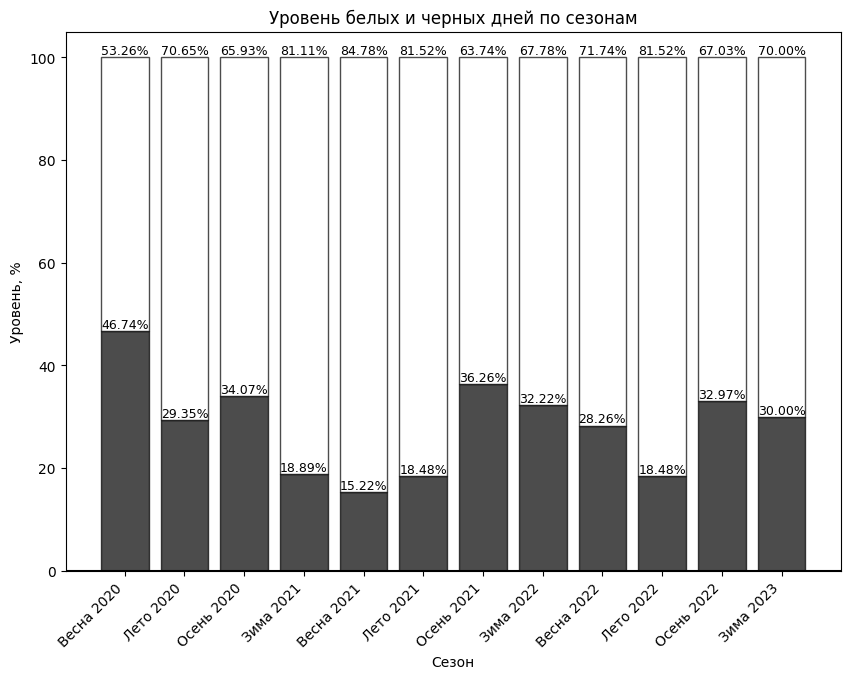

In [388]:
plt.figure(figsize=(10, 7))

bar2 = plt.bar(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Уровень черных дней'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')
bar1 = plt.bar(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Уровень белых дней'], bottom=season_levels_df['Уровень черных дней'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')

for i, (val1, val2) in enumerate(zip(season_levels_df['Уровень белых дней'], season_levels_df['Уровень черных дней'])):
    plt.text(i, val1+val2, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Сезон')
plt.ylabel('Уровень, %')
plt.title('Уровень белых и черных дней по сезонам')
plt.xticks(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Сезон'])
plt.xticks(rotation=45, ha='right')
plt.show()

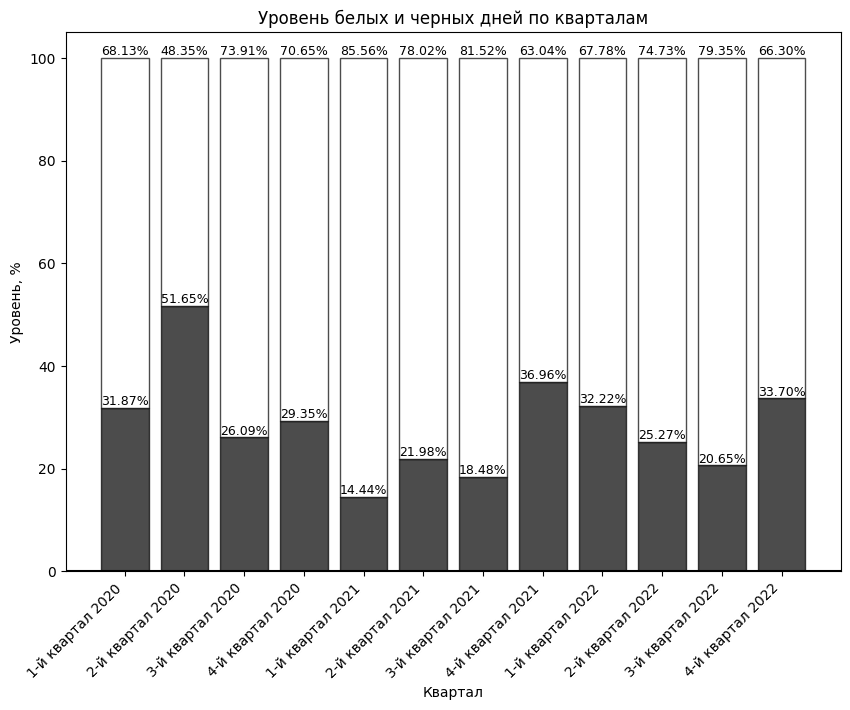

In [389]:
plt.figure(figsize=(10, 7))

bar2 = plt.bar(np.arange(len(quaters_levels_df['Квартал'])), quaters_levels_df['Уровень черных дней'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')
bar1 = plt.bar(np.arange(len(quaters_levels_df['Квартал'])), quaters_levels_df['Уровень белых дней'], bottom=quaters_levels_df['Уровень черных дней'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')

for i, (val1, val2) in enumerate(zip(quaters_levels_df['Уровень белых дней'], quaters_levels_df['Уровень черных дней'])):
    plt.text(i, val1+val2, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Квартал')
plt.ylabel('Уровень, %')
plt.title('Уровень белых и черных дней по кварталам')
plt.xticks(np.arange(len(quaters_levels_df['Квартал'])), quaters_levels_df['Квартал'])
plt.xticks(rotation=45, ha='right')
plt.show()

# Задание 4

### 1. Работа с данными



#### 1.1 Агрегирование данных по годам



Выбрать временные интервалы:

"2020-й год" - с 01 января по 31 декабря;

"2021-й год" - с 01 января по 31 декабря;

"2022-й год" - с 01 января по 31 декабря;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по годам.

In [390]:
df_year = df.copy().loc[(df['Time'] >= '2020-01-01') & (df['Time'] <= '2022-12-31')]

df_year['Год'] = np.where((df_year['Time'].dt.year == 2020), '2020-й год',
                    np.where((df_year['Time'].dt.year == 2021), '2021-й год', '2022-й год'))

df_year['Категория дня'] = np.where((df_year['Var1'] >= mean - std) & (df_year['Var1'] <= mean + std), 'White', 'Black').astype(str)


In [391]:
df_year['Год'].value_counts()

Год
2020-й год    366
2021-й год    365
2022-й год    365
Name: count, dtype: int64

In [392]:
years = ['2020-й год', '2021-й год', '2022-й год']
years_list = []

for year in years:
    count_white_days = np.sum((df_year.loc[df_year['Год'] == year, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_year.loc[df_year['Год'] == year, 'Категория дня'] == 'Black'))    
    year_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / year_len) * 100
    percentage_black_days = (count_black_days / year_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    years_list.append({
        'Год': year,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

year_levels_df = pd.DataFrame(years_list)

year_levels_df

,Год,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,2020-й год,65.300546,34.699454,-5.725095,5.725095
1,2021-й год,76.986301,23.013699,5.960660,-5.960660
2,2022-й год,72.054795,27.945205,1.029153,-1.029153


#### 1.2 Агрегирование сезонных данных со сдвигом



Выбрать временные интервалы (как в сезонах, но весна начинается сне с 01 марта, а с 07 марта): 

"Весна 2020" - с 07 марта; "Весна 2021"; "Весна 2022";

"Лето 2020"; "Лето 2021"; "Лето 2022";

"Осень 2020"; "Осень 2021"; "Осень 2022";

"Зима 2021"; "Зима 2022";"Зима 2023";

Определить уровни белых и черных дней по временам года в каждом году.

In [393]:
df_seasons_shift = df.copy().loc[(df['Time'] >= '2020-03-01') & (df['Time'] <= '2023-02-28')]
df_seasons_shift['Сезон'] = '-'

seasons = {
    'Весна 2020': ('2020-03-07', '2020-05-31'),
    'Весна 2021': ('2021-03-07', '2021-05-31'),
    'Весна 2022': ('2022-03-07', '2022-05-31'),

    'Лето 2020': ('2020-06-01', '2020-08-31'),
    'Лето 2021': ('2021-06-01', '2021-08-31'),
    'Лето 2022': ('2022-06-01', '2022-08-31'),

    'Осень 2020': ('2020-09-01', '2020-11-30'),
    'Осень 2021': ('2021-09-01', '2021-11-30'),
    'Осень 2022': ('2022-09-01', '2022-11-30'),

    'Зима 2021': ('2020-12-01', '2021-02-28'),
    'Зима 2022': ('2021-12-01', '2022-02-28'),
    'Зима 2023': ('2022-12-01', '2023-02-28'),
}

for season, (start_date, end_date) in seasons.items():
    df_seasons_shift.loc[(df_seasons_shift['Time'] >= start_date) & (df_seasons_shift['Time'] <= end_date), 'Сезон'] = season


In [394]:
df_seasons_shift['Сезон'].value_counts()

Сезон
Лето 2020     92
Лето 2021     92
Лето 2022     92
Осень 2020    91
Осень 2021    91
Осень 2022    91
Зима 2021     90
Зима 2022     90
Зима 2023     90
Весна 2020    86
Весна 2021    86
Весна 2022    86
-             18
Name: count, dtype: int64

In [395]:
df_seasons_shift['Категория дня'] = np.where((df_seasons_shift['Var1'] >= mean - std) & (df_seasons_shift['Var1'] <= mean + std), 'White', 'Black').astype(str)


In [396]:
df_seasons_shift['Категория дня'].value_counts()

Категория дня
White    784
Black    311
Name: count, dtype: int64

In [397]:
seasons = ['Весна 2020', 'Лето 2020', 'Осень 2020',
           'Зима 2021', 'Весна 2021', 'Лето 2021', 'Осень 2021',
           'Зима 2022', 'Весна 2022', 'Лето 2022', 'Осень 2022', 
           'Зима 2023'
           ]
seasons_list = []

for season in seasons:
    count_white_days = np.sum((df_seasons_shift.loc[df_seasons_shift['Сезон'] == season, 'Категория дня'] == 'White'))
    count_black_days = np.sum((df_seasons_shift.loc[df_seasons_shift['Сезон'] == season, 'Категория дня'] == 'Black'))    
    season_len = count_white_days + count_black_days

    percentage_white_days = (count_white_days / season_len) * 100
    percentage_black_days = (count_black_days / season_len) * 100

    diff_1 = percentage_white_days - BL1
    diff_2 = percentage_black_days - BL2

    seasons_list.append({
        'Сезон': season,
        'Уровень белых дней': percentage_white_days,
        'Уровень черных дней': percentage_black_days,
        'Отклонение от BL White': diff_1,
        'Отклонение от BL Black': diff_2
    })

season_levels_df = pd.DataFrame(seasons_list)

season_levels_df

,Сезон,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Весна 2020,51.162791,48.837209,-19.862850,19.862850
1,Лето 2020,70.652174,29.347826,-0.373467,0.373467
2,Осень 2020,65.934066,34.065934,-5.091575,5.091575
3,Зима 2021,81.111111,18.888889,10.085470,-10.085470
4,Весна 2021,83.720930,16.279070,12.695289,-12.695289
5,Лето 2021,81.521739,18.478261,10.496098,-10.496098
6,Осень 2021,63.736264,36.263736,-7.289377,7.289377
7,Зима 2022,67.777778,32.222222,-3.247863,3.247863
8,Весна 2022,70.930233,29.069767,-0.095408,0.095408
9,Лето 2022,81.521739,18.478261,10.496098,-10.496098


### 2. Визуализация


#### 2.1 Визуализация агрегированных данных по годам


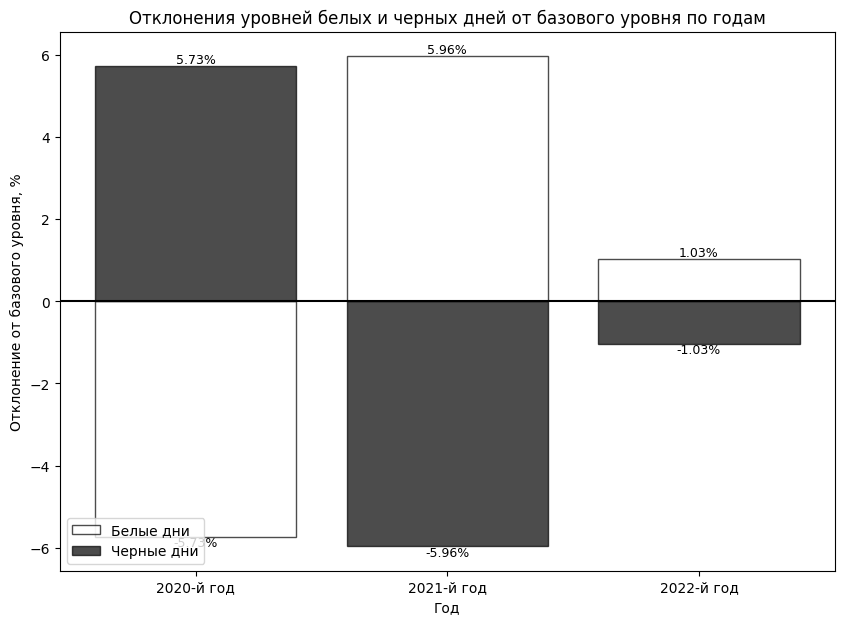

In [398]:
plt.figure(figsize=(10, 7))

bar1 = plt.bar(np.arange(len(year_levels_df['Год'])), year_levels_df['Отклонение от BL White'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')
bar2 = plt.bar(np.arange(len(year_levels_df['Год'])), year_levels_df['Отклонение от BL Black'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')

for i, (val1, val2) in enumerate(zip(year_levels_df['Отклонение от BL White'], year_levels_df['Отклонение от BL Black'])):
    plt.text(i, val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Год')
plt.ylabel('Отклонение от базового уровня, %')
plt.title('Отклонения уровней белых и черных дней от базового уровня по годам')
plt.xticks(np.arange(len(year_levels_df['Год'])), year_levels_df['Год'])
plt.legend(loc='lower left')
plt.show()


#### 2.2 Визуализация агрегированных сезонных данных со сдвигом


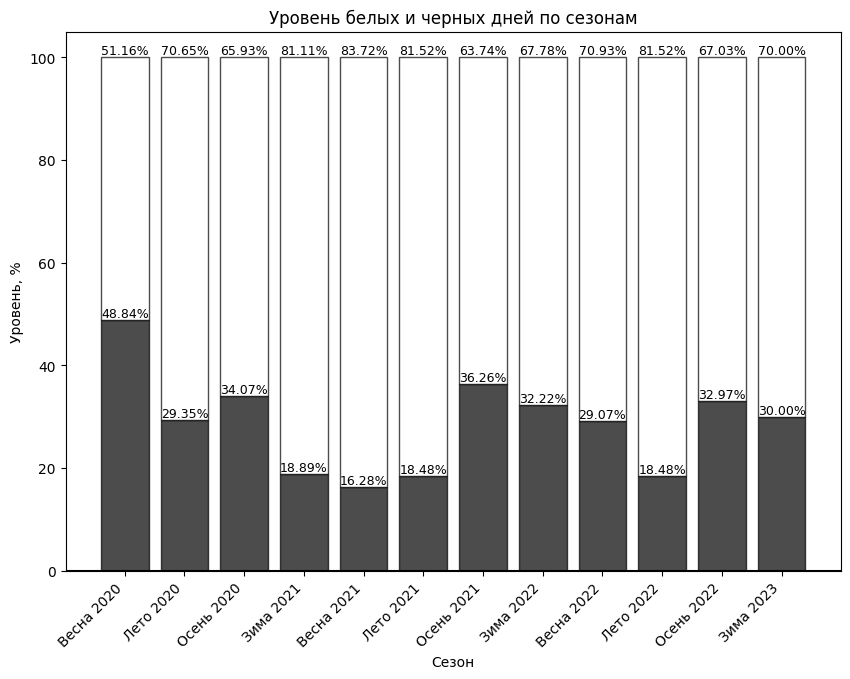

In [399]:
plt.figure(figsize=(10, 7))

bar2 = plt.bar(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Уровень черных дней'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')
bar1 = plt.bar(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Уровень белых дней'], bottom=season_levels_df['Уровень черных дней'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')

for i, (val1, val2) in enumerate(zip(season_levels_df['Уровень белых дней'], season_levels_df['Уровень черных дней'])):
    plt.text(i, val1+val2, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
    plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Сезон')
plt.ylabel('Уровень, %')
plt.title('Уровень белых и черных дней по сезонам')
plt.xticks(np.arange(len(season_levels_df['Сезон'])), season_levels_df['Сезон'])
plt.xticks(rotation=45, ha='right')
plt.show()

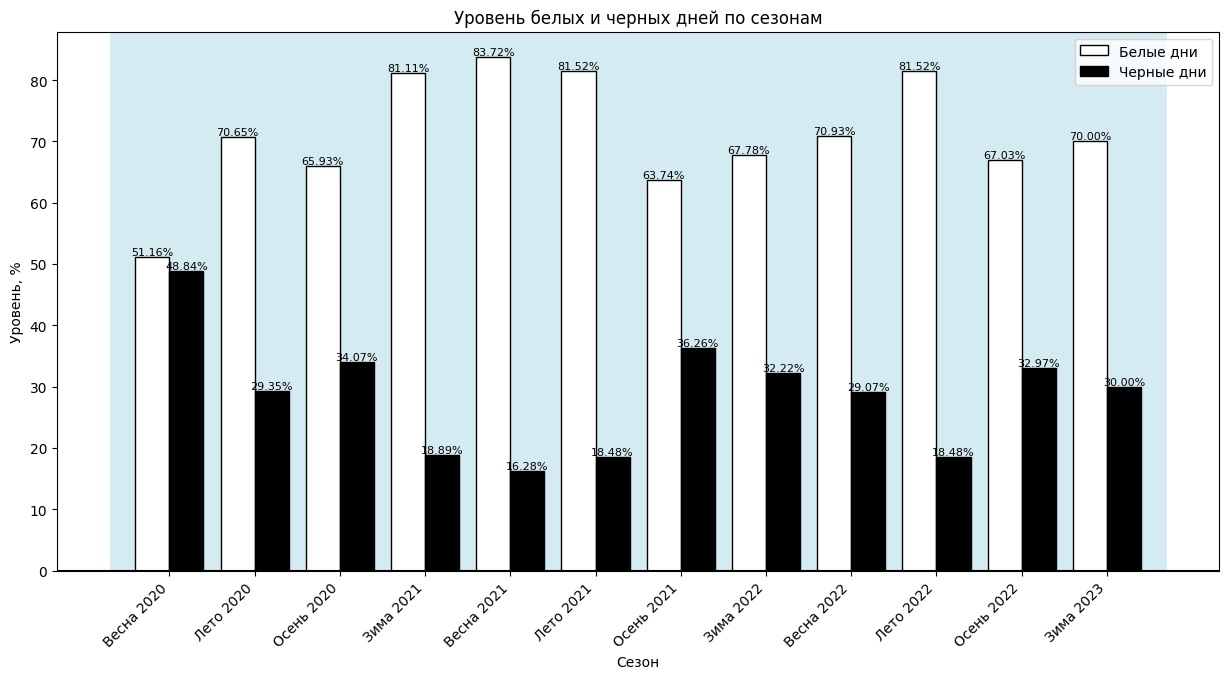

In [400]:
plt.figure(figsize=(15, 7))

bar_width = 0.4
bar_positions1 = np.arange(len(season_levels_df['Сезон']))
bar_positions2 = bar_positions1 + bar_width

plt.axvspan(bar_positions1[0] - 0.5, bar_positions2[-1] + 0.5, facecolor='lightblue', alpha=0.5)

bar1 = plt.bar(bar_positions1, season_levels_df['Уровень белых дней'], width=bar_width, color='white', edgecolor='black', label='Белые дни')
bar2 = plt.bar(bar_positions2, season_levels_df['Уровень черных дней'], width=bar_width, color='black', edgecolor='black', label='Черные дни')

for i, (val1, val2) in enumerate(zip(season_levels_df['Уровень белых дней'], season_levels_df['Уровень черных дней'])):
    plt.text(bar_positions1[i], val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=8, color='black')
    plt.text(bar_positions2[i], val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=8, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Сезон')
plt.ylabel('Уровень, %')
plt.title('Уровень белых и черных дней по сезонам')
plt.xticks((bar_positions1 + bar_positions2) / 2, season_levels_df['Сезон'])
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


добавил фон, так как все сливалось

### 3. Анализ диаграмм


По графику видно, что весной и летом происходит наибольший рост белых дней, и уменьшение черных. Осенью и зимой рост также наблюдается, но он меньше. 

В 2020 году произошел резкий сдвиг в сторону увеличения черных дней. Далее наблюдается положительная динамика роста белых дней, и уменьшения черных. 

Также заметны сезонные колебания, летом уровень белых дней выше, чем в другие сезоны. Осенью наблюдается снижение уровня белых дней.

Весной 2021 самый высокий уровень белых дней. Летом 2021 и 2022 одинаковый уровень белых и черных дней.

Можно сказать, что присутствует некая устойчивость в динамике изменения данных. Наверное, не имея контекста сказать что-либо еще по этим графикам сложно.

In [ ]:
def data_load():
    df = pd.read_excel('/Users/nkt1lyn/coef_opr_actions.xlsx')
    return df

In [ ]:
def data_shape(df, date1, date2):
    df = df.loc[(df['Time'] >= date1) & (df['Time'] <= date2)]

In [ ]:
def day_cat(df):
    df['Категория дня'] = np.where((df['Var1'] >= mean - std) & (df['Var1'] <= mean + std), 'White', 'Black').astype(str)
    return df

In [ ]:
def quarter(df):
    df['Квартал'] = np.where((df['Time'].dt.month >= 1) & (df['Time'].dt.month <= 3), '1-й квартал',
                      np.where((df['Time'].dt.month >= 4) & (df['Time'].dt.month <= 6), '2-й квартал',
                               np.where((df['Time'].dt.month >= 7) & (df['Time'].dt.month <= 9), '3-й квартал', '4-й квартал')))
    return df

In [ ]:
def season(df):
    df['Время года'] = np.where((df['Time'].dt.month >= 3) & (df['Time'].dt.month <= 5), 'Весна',
                    np.where((df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 8), 'Лето',
                               np.where((df['Time'].dt.month >= 9) & (df['Time'].dt.month <= 11), 'Осень', 'Зима')))
    return df